<a href="https://colab.research.google.com/github/BlackApril/-24-/blob/main/%EB%AA%A8%EB%8D%B8_%ED%85%8C%EC%8A%A4%ED%8A%B8_%ED%95%B4%EB%B4%90%EC%95%BC%EA%B2%A0%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install koreanize-matplotlib

# **기업 안전도 예측**

In [19]:
# 코랩용: 가상 데이터 생성 + CSV 저장 + 다운로드
import pandas as pd
import numpy as np
from google.colab import files

np.random.seed(42)

# 기업 및 산업
기업목록 = [f'기업_{i+1}' for i in range(10)]
산업목록 = ['건설업','광업','제조업','건설업','광업','제조업','건설업','광업','제조업','건설업']
직원수 = 300

데이터 = []

for i, 기업 in enumerate(기업목록):
    산업 = 산업목록[i]
    for _ in range(int(직원수/len(기업목록))):  # 각 기업별 균등 배분
        연봉 = np.random.randint(2500,5000)*1000        # 2,500~5,000만원
        근무시간 = np.random.randint(35,65)            # 주당 근무시간
        안전장비 = np.random.choice(['제공','미제공'], p=[0.8,0.2])

        # 5지선다 항목
        임금 = np.random.randint(1,6)
        복지 = np.random.randint(1,6)
        근무환경 = np.random.randint(1,6)
        계약연장률 = np.random.randint(1,6)
        주별근무일수 = np.random.randint(1,6)

        데이터.append([기업, 산업, 연봉, 근무시간, 안전장비, 임금, 복지, 근무환경, 계약연장률, 주별근무일수])

# DataFrame 생성
df = pd.DataFrame(데이터, columns=[
    '기업명','산업','연봉','근무시간','안전장비제공',
    '임금','복지','근무환경','계약연장률','주별근무일수'
])

# CSV 저장
file_path = "/content/가상_외국인근로자_설문데이터_5지선다_300.csv"
df.to_csv(file_path, index=False, encoding='utf-8-sig')

# 다운로드
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# 통합: 기업 선택 + 4종 시각화 (임금, 근무시간, 안전장비, 근로조건)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from math import pi

# CSV 불러오기
df = pd.read_csv('/content/가상_외국인근로자_설문데이터_5지선다_300.csv')

# 기업 선택
print("선택 가능한 기업 목록:")
print(df['기업명'].unique())
선택 = input("시각화할 기업명을 입력하세요: ")
기업_df = df[df['기업명']==선택]

# ================================
# 1) 임금 수준 비교 (막대그래프)
자사평균_연봉 = 기업_df['연봉'].mean()
업종평균_연봉 = df[df['산업']==기업_df['산업'].iloc[0]]['연봉'].mean()
유사기업평균_연봉 = df[df['기업명'].isin(df['기업명'].unique()[:3])]['연봉'].mean()

plt.figure(figsize=(6,4))
plt.bar(['자사','업종 평균','유사 기업 평균'], [자사평균_연봉, 업종평균_연봉, 유사기업평균_연봉],
        color=['#4E79A7','#B0B0B0','#B0B0B0'])
plt.ylabel('연봉 (만원)')
plt.title(f'{선택} 임금 수준 비교')
plt.show()

# ================================
# 2) 근무 시간 비교 (막대그래프)
자사평균_근무시간 = 기업_df['근무시간'].mean()
업종평균_근무시간 = df[df['산업']==기업_df['산업'].iloc[0]]['근무시간'].mean()
유사기업평균_근무시간 = df[df['기업명'].isin(df['기업명'].unique()[:3])]['근무시간'].mean()

plt.figure(figsize=(6,4))
plt.bar(['자사','업종 평균','유사 기업 평균'], [자사평균_근무시간, 업종평균_근무시간, 유사기업평균_근무시간],
        color=['#4E79A7','#B0B0B0','#B0B0B0'])
plt.ylabel('근무 시간 (주/시간)')
plt.title(f'{선택} 근무 시간 비교')
plt.show()

# ================================
# 3) 안전장비 제공율 (원그래프)
제공_있음 = (기업_df['안전장비제공']=='제공').sum()
제공_없음 = (기업_df['안전장비제공']=='미제공').sum()

plt.figure(figsize=(4,4))
plt.pie([제공_있음, 제공_없음], labels=['제공','미제공'], autopct='%1.1f%%', colors=['#4E79A7','#B0B0B0'])
plt.title(f'{선택} 안전장비 제공 여부')
plt.show()

# ================================
# 4) 근로조건 비교 (오각형 그래프)
labels = ['임금','복지','주별근무일수','근무환경','계약연장률']
values = [
    기업_df['임금'].mean(),
    기업_df['복지'].mean(),
    기업_df['주별근무일수'].mean(),
    기업_df['근무환경'].mean(),
    기업_df['계약연장률'].mean()
]

num_vars = len(labels)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
values += values[:1]  # 시작점 연결
angles += angles[:1]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, linewidth=2, linestyle='solid', label=선택, color='#4E79A7')
ax.fill(angles, values, alpha=0.25, color='#4E79A7')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
plt.title(f'{선택} 근로조건 비교')
plt.show()


선택 가능한 기업 목록:
['기업_1' '기업_2' '기업_3' '기업_4' '기업_5' '기업_6' '기업_7' '기업_8' '기업_9' '기업_10']
시각화할 기업명을 입력하세요: 3


IndexError: single positional indexer is out-of-bounds

검증 MSE: 0.237


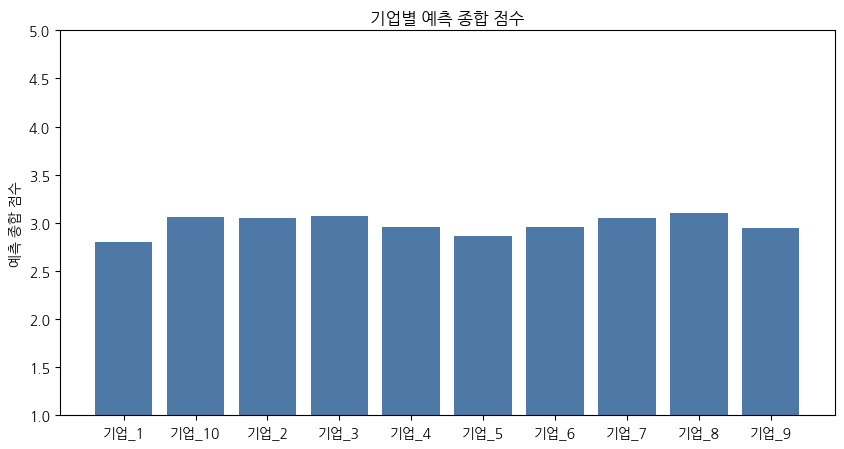

In [21]:
# =========================
# 1) 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# =========================
# 2) 데이터 불러오기 (가상 CSV)
df = pd.read_csv('/content/가상_외국인근로자_설문데이터_5지선다_300.csv')

# =========================
# 3) 입력(X)과 출력(y) 정의
X = df[['임금','복지','주별근무일수','근무환경','계약연장률']]
# 가상으로 종합 점수 만들기 (실제라면 설문 + 리뷰 데이터)
np.random.seed(42)
y = X.mean(axis=1) + np.random.normal(0, 0.5, len(X))  # 가상 종합 점수

# =========================
# 4) 학습용/검증용 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# 5) 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# =========================
# 6) 예측
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'검증 MSE: {mse:.3f}')

# =========================
# 7) 기업별 평균 예측 점수 계산
df['예측_종합점수'] = model.predict(X)
기업평균 = df.groupby('기업명')['예측_종합점수'].mean()

# =========================
# 8) 시각화 (막대그래프)
plt.figure(figsize=(10,5))
plt.bar(기업평균.index, 기업평균.values, color='#4E79A7')
plt.ylabel('예측 종합 점수')
plt.title('기업별 예측 종합 점수')
plt.ylim(1,5)
plt.show()


# **한번 예측 모델 만드는중**

In [22]:
import pandas as pd
import numpy as np

np.random.seed(42)

# -----------------------
# 1) 기업 및 산업 정의
기업리스트 = [f'기업{i}' for i in range(1, 1001)]
산업리스트 = ['건설업','광업','제조업']

# -----------------------
# 2) 직원 데이터 생성 (10000명)
data = []
for i in range(10000):
    기업 = np.random.choice(기업리스트)
    산업 = np.random.choice(산업리스트)
    임금 = np.random.randint(1,6)
    복지 = np.random.randint(1,6)
    근무환경 = np.random.randint(1,6)
    주별근무일수 = np.random.randint(1,6)
    계약연장률 = np.random.randint(1,6)
    안전장비 = np.random.choice([0,1])
    근무시간 = np.random.randint(8,13)
    data.append([기업, 산업, 임금, 복지, 근무환경, 주별근무일수, 계약연장률, 안전장비, 근무시간])

df = pd.DataFrame(data, columns=[
    '기업명','산업','임금','복지','근무환경','주별근무일수','계약연장률','안전장비','근무시간'
])

# -----------------------
# 3) 가상 사용자 정보 추가
# 단일 사용자 기준 예시 (여러 사용자로 확장 가능)
df['사용자_임금중요도'] = 5
df['사용자_복지중요도'] = 3
df['사용자_근무환경중요도'] = 4
df['사용자_주별근무일수중요도'] = 2
df['사용자_계약연장률중요도'] = 1
df['사용자_최소연봉'] = 3
df['사용자_안전장비필수'] = 1

df['사용자_한국어가능'] = 1

# -----------------------
# 4) CSV로 저장
df.to_csv('/content/가상_외국인근로자_데이터_사용자정보포함.csv', index=False)
print("CSV 파일 생성 완료!")
df.head()


CSV 파일 생성 완료!


,기업명,산업,임금,복지,근무환경,주별근무일수,계약연장률,안전장비,근무시간,사용자_임금중요도,사용자_복지중요도,사용자_근무환경중요도,사용자_주별근무일수중요도,사용자_계약연장률중요도,사용자_최소연봉,사용자_안전장비필수,사용자_한국어가능
0,기업103,건설업,3,5,5,2,3,0,10,5,3,4,2,1,3,1,1
1,기업459,건설업,4,3,5,2,4,1,9,5,3,4,2,1,3,1,1
2,기업192,건설업,1,4,2,5,4,0,8,5,3,4,2,1,3,1,1
3,기업475,제조업,2,4,4,3,4,0,11,5,3,4,2,1,3,1,1
4,기업832,건설업,3,5,3,5,1,0,9,5,3,4,2,1,3,1,1


보기 원하는 기업을 선택하세요:
1. 기업1
2. 기업2
3. 기업3
4. 기업4
5. 기업5
6. 기업6
7. 기업7
8. 기업8
9. 기업9
10. 기업10
11. 기업11
12. 기업12
13. 기업13
14. 기업14
15. 기업15
16. 기업16
17. 기업17
18. 기업18
19. 기업19
20. 기업20
21. 기업21
22. 기업22
23. 기업23
24. 기업24
25. 기업25
26. 기업26
27. 기업27
28. 기업28
29. 기업29
30. 기업30
31. 기업31
32. 기업32
33. 기업33
34. 기업34
35. 기업35
36. 기업36
37. 기업37
38. 기업38
39. 기업39
40. 기업40
41. 기업41
42. 기업42
43. 기업43
44. 기업44
45. 기업45
46. 기업46
47. 기업47
48. 기업48
49. 기업49
50. 기업50
51. 기업51
52. 기업52
53. 기업53
54. 기업54
55. 기업55
56. 기업56
57. 기업57
58. 기업58
59. 기업59
60. 기업60
61. 기업61
62. 기업62
63. 기업63
64. 기업64
65. 기업65
66. 기업66
67. 기업67
68. 기업68
69. 기업69
70. 기업70
71. 기업71
72. 기업72
73. 기업73
74. 기업74
75. 기업75
76. 기업76
77. 기업77
78. 기업78
79. 기업79
80. 기업80
81. 기업81
82. 기업82
83. 기업83
84. 기업84
85. 기업85
86. 기업86
87. 기업87
88. 기업88
89. 기업89
90. 기업90
91. 기업91
92. 기업92
93. 기업93
94. 기업94
95. 기업95
96. 기업96
97. 기업97
98. 기업98
99. 기업99
100. 기업100
101. 기업101
102. 기업102
103. 기업103
104. 기업104
105. 기업105
106. 기업106
107. 기업107
108. 기업108
109. 기업109

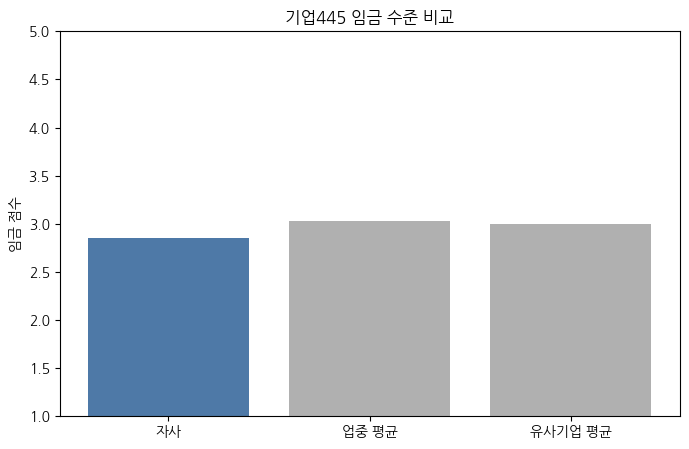

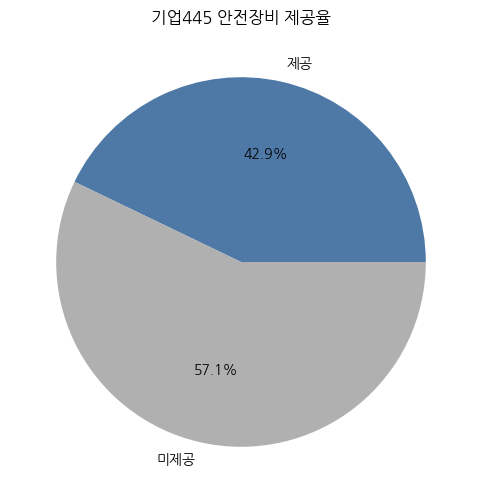

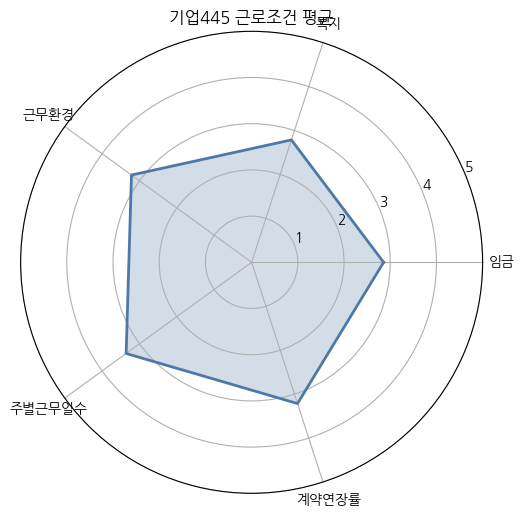

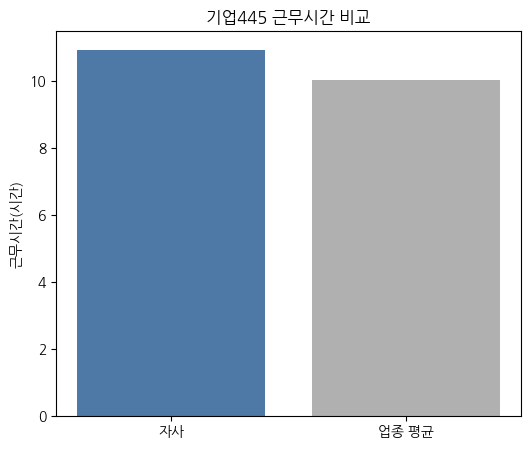

검증 MSE: 0.498


/tmp/ipython-input-1802473161.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_기업['예측_종합점수'] = model.predict(X)
/tmp/ipython-input-1802473161.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_기업['맞춤점수'] = df_기업[근로조건].values.dot(가중치)


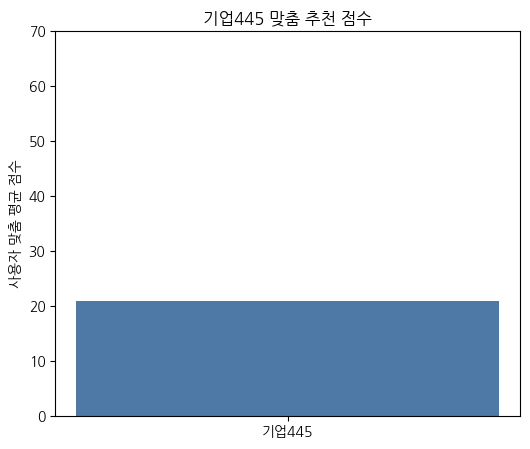

In [23]:
# =========================
# 0) 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# =========================
# 1) 기업 선택
기업리스트 = [f'기업{i}' for i in range(1, 1001)]

print("보기 원하는 기업을 선택하세요:")
for idx, 기업 in enumerate(기업리스트, 1):
    print(f"{idx}. {기업}")

선택 = int(input("선택 번호 입력: "))
선택기업 = 기업리스트[선택-1]
print(f"선택한 기업: {선택기업}")

# =========================
# 2) CSV 불러오기 & 선택한 기업 필터
df = pd.read_csv('/content/가상_외국인근로자_데이터_사용자정보포함.csv')
df_기업 = df[df['기업명'] == 선택기업]

# =========================
# 3) 임금 수준 막대그래프 [자사, 업중 평균, 유사 기업 평균]
기업평균임금 = df_기업['임금'].mean()
업종평균임금 = df[df['산업']==df_기업['산업'].iloc[0]]['임금'].mean()
유사기업평균임금 = df[df['기업명']!=선택기업]['임금'].mean()

plt.figure(figsize=(8,5))
plt.bar(['자사','업중 평균','유사기업 평균'], [기업평균임금, 업종평균임금, 유사기업평균임금],
        color=['#4E79A7','#B0B0B0','#B0B0B0'])
plt.ylabel('임금 점수')
plt.title(f'{선택기업} 임금 수준 비교')
plt.ylim(1,5)
plt.show()

# =========================
# 4) 안전장비 제공율 원형그래프
안전제공 = df_기업['안전장비'].sum()
미제공 = len(df_기업) - 안전제공
plt.figure(figsize=(6,6))
plt.pie([안전제공, 미제공], labels=['제공','미제공'], autopct='%1.1f%%',
        colors=['#4E79A7','#B0B0B0'])
plt.title(f'{선택기업} 안전장비 제공율')
plt.show()

# =========================
# 5) 근로조건 오각형 그래프
from math import pi

근로조건 = ['임금','복지','근무환경','주별근무일수','계약연장률']
values = df_기업[근로조건].mean().tolist()
values += values[:1]  # 닫기 위해 첫값 추가

angles = [n / float(len(근로조건)) * 2 * pi for n in range(len(근로조건))]
angles += angles[:1]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, color='#4E79A7', linewidth=2)
ax.fill(angles, values, color='#4E79A7', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(근로조건)
ax.set_yticks([1,2,3,4,5])
ax.set_yticklabels([1,2,3,4,5])
plt.title(f'{선택기업} 근로조건 평균')
plt.show()

# =========================
# 6) 근무시간 막대그래프
평균근무시간 = df_기업['근무시간'].mean()
업종평균근무시간 = df[df['산업']==df_기업['산업'].iloc[0]]['근무시간'].mean()
plt.figure(figsize=(6,5))
plt.bar(['자사','업종 평균'], [평균근무시간, 업종평균근무시간], color=['#4E79A7','#B0B0B0'])
plt.ylabel('근무시간(시간)')
plt.title(f'{선택기업} 근무시간 비교')
plt.show()

# =========================
# 7) AI 예측 점수(RandomForest)
X = df_기업[근로조건]
y = X.mean(axis=1) + np.random.normal(0,0.5,len(X))  # 가상 종합 점수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'검증 MSE: {mean_squared_error(y_test, y_pred):.3f}')

df_기업['예측_종합점수'] = model.predict(X)

# =========================
# 8) 사용자 맞춤 추천 점수
가중치 = np.array([5,3,4,2,1])  # 사용자 중요도 임의 지정
df_기업['맞춤점수'] = df_기업[근로조건].values.dot(가중치)
# 안전장비 필수 조건 미충족시 점수 0 처리
df_기업.loc[df_기업['안전장비']==0, '맞춤점수'] = 0

# 기업 맞춤 평균 점수 시각화
plt.figure(figsize=(6,5))
plt.bar([선택기업], [df_기업['맞춤점수'].mean()], color='#4E79A7')
plt.ylabel('사용자 맞춤 평균 점수')
plt.title(f'{선택기업} 맞춤 추천 점수')
plt.ylim(0, 5*len(df_기업))  # 최대값 대비
plt.show()


# **최종**

보기 원하는 기업을 선택하세요:
1. 기업1
2. 기업2
3. 기업3
4. 기업4
5. 기업5
6. 기업6
7. 기업7
8. 기업8
9. 기업9
10. 기업10
11. 기업11
12. 기업12
13. 기업13
14. 기업14
15. 기업15
16. 기업16
17. 기업17
18. 기업18
19. 기업19
20. 기업20
21. 기업21
22. 기업22
23. 기업23
24. 기업24
25. 기업25
26. 기업26
27. 기업27
28. 기업28
29. 기업29
30. 기업30
31. 기업31
32. 기업32
33. 기업33
34. 기업34
35. 기업35
36. 기업36
37. 기업37
38. 기업38
39. 기업39
40. 기업40
41. 기업41
42. 기업42
43. 기업43
44. 기업44
45. 기업45
46. 기업46
47. 기업47
48. 기업48
49. 기업49
50. 기업50
51. 기업51
52. 기업52
53. 기업53
54. 기업54
55. 기업55
56. 기업56
57. 기업57
58. 기업58
59. 기업59
60. 기업60
61. 기업61
62. 기업62
63. 기업63
64. 기업64
65. 기업65
66. 기업66
67. 기업67
68. 기업68
69. 기업69
70. 기업70
71. 기업71
72. 기업72
73. 기업73
74. 기업74
75. 기업75
76. 기업76
77. 기업77
78. 기업78
79. 기업79
80. 기업80
81. 기업81
82. 기업82
83. 기업83
84. 기업84
85. 기업85
86. 기업86
87. 기업87
88. 기업88
89. 기업89
90. 기업90
91. 기업91
92. 기업92
93. 기업93
94. 기업94
95. 기업95
96. 기업96
97. 기업97
98. 기업98
99. 기업99
100. 기업100
101. 기업101
102. 기업102
103. 기업103
104. 기업104
105. 기업105
106. 기업106
107. 기업107
108. 기업108
109. 기업109

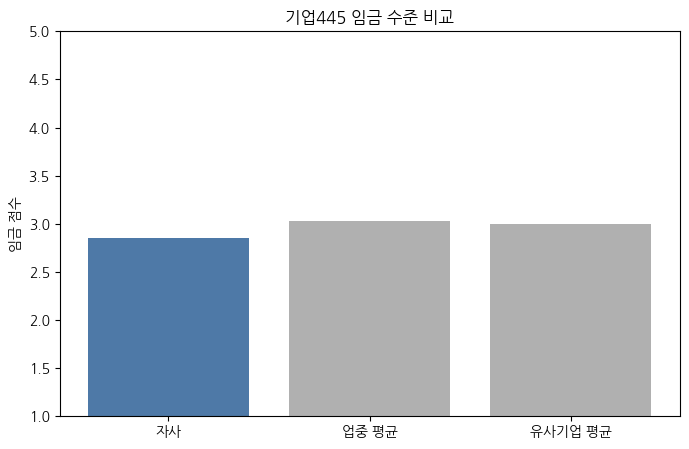

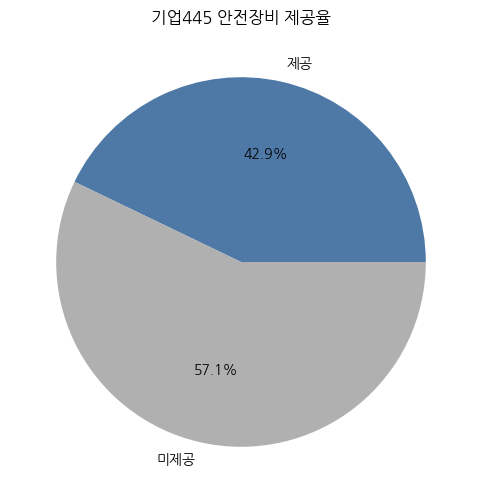

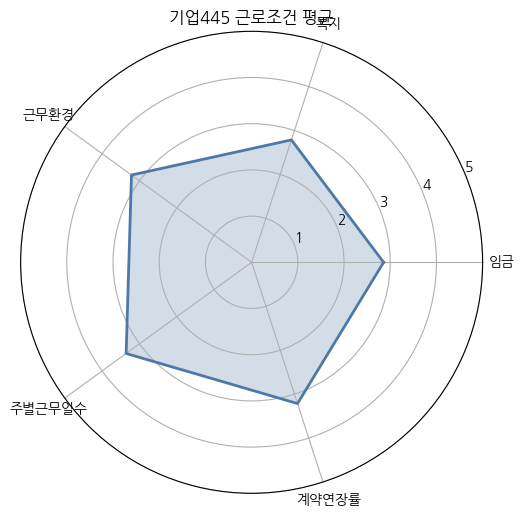

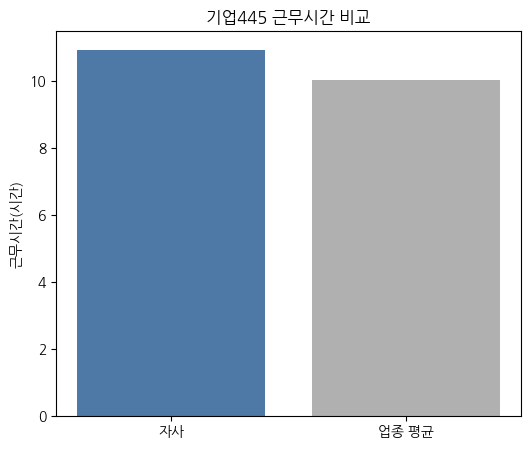

검증 MSE: 1.645


/tmp/ipython-input-1052714298.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_기업['예측_종합점수'] = model.predict(X)
/tmp/ipython-input-1052714298.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_기업['예측_종합점수_100점'] = (df_기업['예측_종합점수'] - 1) / 4 * 100


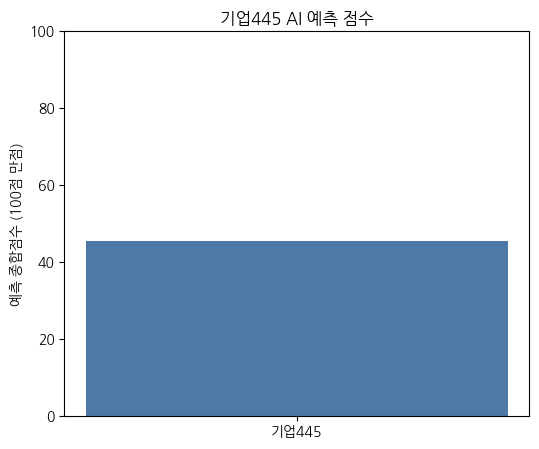

In [24]:
# =========================
# 0) 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# =========================
# 1) 기업 선택
기업리스트 = [f'기업{i}' for i in range(1, 1001)]

print("보기 원하는 기업을 선택하세요:")
for idx, 기업 in enumerate(기업리스트, 1):
    print(f"{idx}. {기업}")

선택 = int(input("선택 번호 입력: "))
선택기업 = 기업리스트[선택-1]
print(f"선택한 기업: {선택기업}")

# =========================
# 2) CSV 불러오기 & 선택한 기업 필터
df = pd.read_csv('/content/가상_외국인근로자_데이터_사용자정보포함.csv')
df_기업 = df[df['기업명'] == 선택기업]

# =========================
# 3) 임금 수준 막대그래프 [자사, 업중 평균, 유사 기업 평균]
기업평균임금 = df_기업['임금'].mean()
업종평균임금 = df[df['산업']==df_기업['산업'].iloc[0]]['임금'].mean()
유사기업평균임금 = df[df['기업명']!=선택기업]['임금'].mean()

plt.figure(figsize=(8,5))
plt.bar(['자사','업중 평균','유사기업 평균'], [기업평균임금, 업종평균임금, 유사기업평균임금],
        color=['#4E79A7','#B0B0B0','#B0B0B0'])
plt.ylabel('임금 점수')
plt.title(f'{선택기업} 임금 수준 비교')
plt.ylim(1,5)
plt.show()

# =========================
# 4) 안전장비 제공율 원형그래프
안전제공 = df_기업['안전장비'].sum()
미제공 = len(df_기업) - 안전제공
plt.figure(figsize=(6,6))
plt.pie([안전제공, 미제공], labels=['제공','미제공'], autopct='%1.1f%%',
        colors=['#4E79A7','#B0B0B0'])
plt.title(f'{선택기업} 안전장비 제공율')
plt.show()

# =========================
# 5) 근로조건 오각형 그래프
from math import pi

근로조건 = ['임금','복지','근무환경','주별근무일수','계약연장률']
values = df_기업[근로조건].mean().tolist()
values += values[:1]  # 닫기 위해 첫값 추가

angles = [n / float(len(근로조건)) * 2 * pi for n in range(len(근로조건))]
angles += angles[:1]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, color='#4E79A7', linewidth=2)
ax.fill(angles, values, color='#4E79A7', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(근로조건)
ax.set_yticks([1,2,3,4,5])
ax.set_yticklabels([1,2,3,4,5])
plt.title(f'{선택기업} 근로조건 평균')
plt.show()

# =========================
# 6) 근무시간 막대그래프
평균근무시간 = df_기업['근무시간'].mean()
업종평균근무시간 = df[df['산업']==df_기업['산업'].iloc[0]]['근무시간'].mean()
plt.figure(figsize=(6,5))
plt.bar(['자사','업종 평균'], [평균근무시간, 업종평균근무시간], color=['#4E79A7','#B0B0B0'])
plt.ylabel('근무시간(시간)')
plt.title(f'{선택기업} 근무시간 비교')
plt.show()

# =========================
# 7) AI 예측 점수(RandomForest) + 100점 만점 변환
X = df_기업[근로조건]
y = X.mean(axis=1) + np.random.normal(0,0.5,len(X))  # 가상 종합 점수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'검증 MSE: {mean_squared_error(y_test, y_pred):.3f}')

# 예측 점수 1~5 -> 100점 만점 변환
df_기업['예측_종합점수'] = model.predict(X)
df_기업['예측_종합점수_100점'] = (df_기업['예측_종합점수'] - 1) / 4 * 100

# =========================
# 예측 점수 100점 만점 시각화
plt.figure(figsize=(6,5))
plt.bar([선택기업], [df_기업['예측_종합점수_100점'].mean()], color='#4E79A7')
plt.ylabel('예측 종합점수 (100점 만점)')
plt.title(f'{선택기업} AI 예측 점수')
plt.ylim(0,100)
plt.show()


# **모델 테스트**

In [28]:
# =========================
# 0) 라이브러리
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# =========================
# 1) 가상 데이터 생성
np.random.seed(42)
직원수 = 300
기업수 = 10
산업 = ['건설업','광업','제조업']
근로조건 = ['임금','복지','근무환경','주별근무일수','계약연장률']

data = []
for i in range(직원수):
    기업 = f'기업{np.random.randint(1,기업수+1)}'
    산업선택 = np.random.choice(산업)
    임금 = np.random.randint(1,6)
    복지 = np.random.randint(1,6)
    근무환경 = np.random.randint(1,6)
    주별근무일수 = np.random.randint(1,6)
    계약연장률 = np.random.randint(1,6)
    근무시간 = np.random.randint(40,61)  # 주 40~60시간
    안전장비 = np.random.choice([0,1], p=[0.3,0.7])
    data.append([기업, 산업선택, 임금, 복지, 근무환경, 주별근무일수, 계약연장률, 근무시간, 안전장비])

df = pd.DataFrame(data, columns=['기업명','산업']+근로조건+['근무시간','안전장비'])

# =========================
# 2) 사용자 맞춤 점수(target) 생성
# 가중치 예시: 사용자가 임금과 근무환경을 중요하게 여긴다고 가정
사용자가중치 = np.array([5,3,4,2,1])
X_input = df[근로조건].values
df['맞춤점수'] = X_input.dot(사용자가중치)
# 안전장비 필수 조건 미충족 시 점수 0 처리
df.loc[df['안전장비']==0, '맞춤점수'] = 0

# =========================
# 3) 추천 AI 학습
X = df[근로조건+['근무시간','안전장비']]  # feature
y = df['맞춤점수']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# =========================
# 4) 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'추천 AI 성능 테스트 결과')
print(f'MSE: {mse:.3f}')
print(f'R²: {r2:.3f}')

# =========================
# 5) 예측 점수 100점 만점 환산
df['예측_100점'] = (model.predict(X) / df['맞춤점수'].max()) * 100
print("\n예측 점수 샘플 (100점 만점):")
print(df[['기업명','맞춤점수','예측_100점']].head())


추천 AI 성능 테스트 결과
MSE: 10.468
R²: 0.974

예측 점수 샘플 (100점 만점):
    기업명  맞춤점수    예측_100점
0   기업7    57  77.412269
1   기업5    55  75.151479
2  기업10     0   0.000000
3   기업3     0   0.000000
4   기업7     0   0.000000


# **최최종?**

보기 원하는 기업을 선택하세요:
1. 기업1
2. 기업2
3. 기업3
4. 기업4
5. 기업5
6. 기업6
7. 기업7
8. 기업8
9. 기업9
10. 기업10
선택 번호 입력: 4
선택한 기업: 기업4


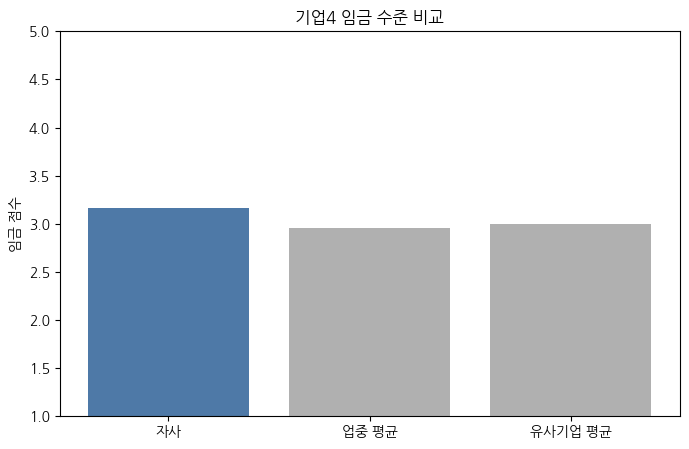

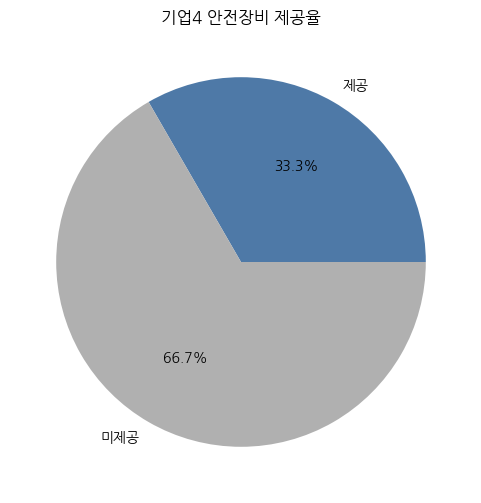

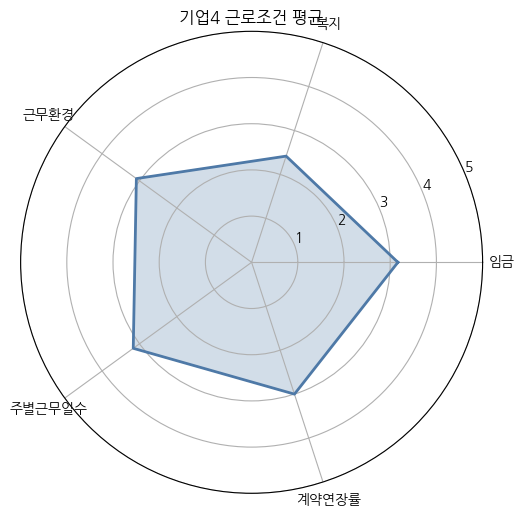

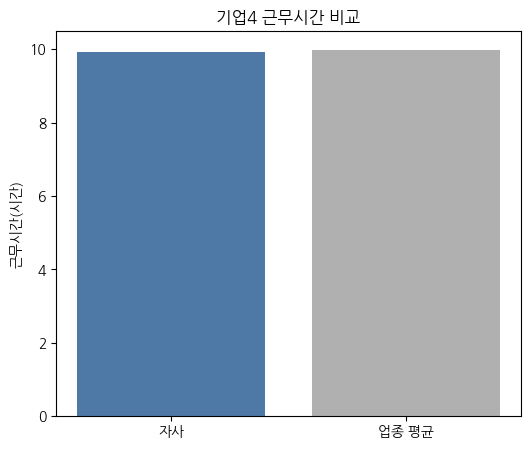

검증 MSE: 0.560


/tmp/ipython-input-3002064452.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_기업['예측_종합점수'] = model.predict(X)
/tmp/ipython-input-3002064452.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_기업['예측_종합점수_100점'] = (df_기업['예측_종합점수'] - 1) / 4 * 100


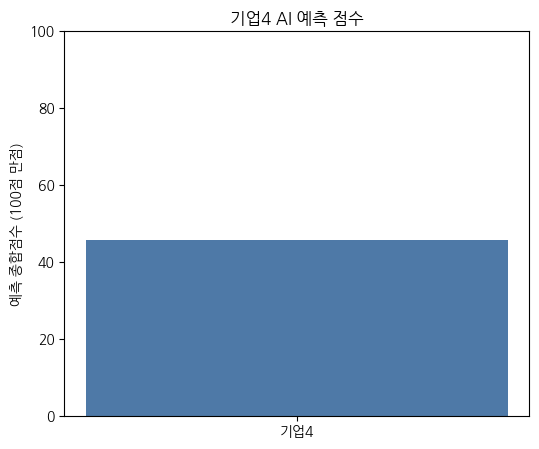

사용자 우선도를 1~5로 입력 (1: 최소, 5: 최고)
임금: 4
복지: 4
근무환경: 1
주별 근무일수: 2
계약 연장율: 5


/tmp/ipython-input-3002064452.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_기업['맞춤점수'] = df_기업[근로조건].values.dot(가중치)


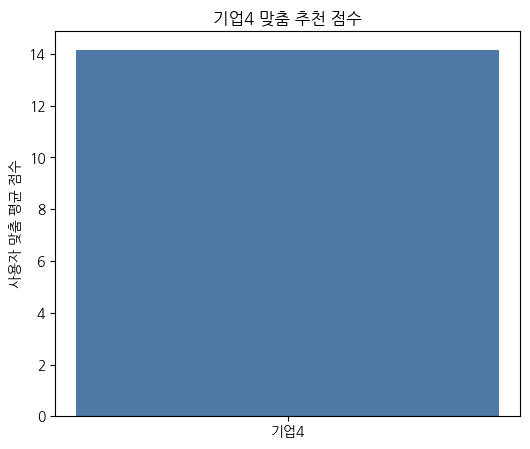

샘플 맞춤점수:
      기업명  맞춤점수
448   기업4     0
621   기업4     0
2926  기업4     0
3133  기업4    49
3616  기업4    37


In [27]:
5
6
# =========================
# 0) 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import pi

# =========================
# 1) 기업 선택
기업리스트 = [f'기업{i}' for i in range(1, 11)]  # 예시: 10개 기업

print("보기 원하는 기업을 선택하세요:")
for idx, 기업 in enumerate(기업리스트, 1):
    print(f"{idx}. {기업}")

선택 = int(input("선택 번호 입력: "))
선택기업 = 기업리스트[선택-1]
print(f"선택한 기업: {선택기업}")

# =========================
# 2) CSV 불러오기 & 선택한 기업 필터
df = pd.read_csv('/content/가상_외국인근로자_데이터_사용자정보포함.csv')
df_기업 = df[df['기업명'] == 선택기업]

# =========================
# 3) 임금 수준 막대그래프 [자사, 업중 평균, 유사 기업 평균]
기업평균임금 = df_기업['임금'].mean()
업종평균임금 = df[df['산업']==df_기업['산업'].iloc[0]]['임금'].mean()
유사기업평균임금 = df[df['기업명']!=선택기업]['임금'].mean()

plt.figure(figsize=(8,5))
plt.bar(['자사','업중 평균','유사기업 평균'],
        [기업평균임금, 업종평균임금, 유사기업평균임금],
        color=['#4E79A7','#B0B0B0','#B0B0B0'])
plt.ylabel('임금 점수')
plt.title(f'{선택기업} 임금 수준 비교')
plt.ylim(1,5)
plt.show()

# =========================
# 4) 안전장비 제공율 원형그래프
안전제공 = df_기업['안전장비'].sum()
미제공 = len(df_기업) - 안전제공
plt.figure(figsize=(6,6))
plt.pie([안전제공, 미제공], labels=['제공','미제공'], autopct='%1.1f%%',
        colors=['#4E79A7','#B0B0B0'])
plt.title(f'{선택기업} 안전장비 제공율')
plt.show()

# =========================
# 5) 근로조건 오각형 그래프
근로조건 = ['임금','복지','근무환경','주별근무일수','계약연장률']
values = df_기업[근로조건].mean().tolist()
values += values[:1]  # 닫기 위해 첫값 추가

angles = [n / float(len(근로조건)) * 2 * pi for n in range(len(근로조건))]
angles += angles[:1]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, color='#4E79A7', linewidth=2)
ax.fill(angles, values, color='#4E79A7', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(근로조건)
ax.set_yticks([1,2,3,4,5])
ax.set_yticklabels([1,2,3,4,5])
plt.title(f'{선택기업} 근로조건 평균')
plt.show()

# =========================
# 6) 근무시간 막대그래프
평균근무시간 = df_기업['근무시간'].mean()
업종평균근무시간 = df[df['산업']==df_기업['산업'].iloc[0]]['근무시간'].mean()
plt.figure(figsize=(6,5))
plt.bar(['자사','업종 평균'], [평균근무시간, 업종평균근무시간], color=['#4E79A7','#B0B0B0'])
plt.ylabel('근무시간(시간)')
plt.title(f'{선택기업} 근무시간 비교')
plt.show()

# =========================
# 7) AI 예측 점수(RandomForest) + 100점 만점 변환
X = df_기업[근로조건]
y = X.mean(axis=1) + np.random.normal(0,0.5,len(X))  # 가상 종합 점수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'검증 MSE: {mean_squared_error(y_test, y_pred):.3f}')

df_기업['예측_종합점수'] = model.predict(X)
df_기업['예측_종합점수_100점'] = (df_기업['예측_종합점수'] - 1) / 4 * 100

plt.figure(figsize=(6,5))
plt.bar([선택기업], [df_기업['예측_종합점수_100점'].mean()], color='#4E79A7')
plt.ylabel('예측 종합점수 (100점 만점)')
plt.title(f'{선택기업} AI 예측 점수')
plt.ylim(0,100)
plt.show()

# =========================
# 8) 사용자 우선도 입력 & 맞춤 추천 점수 계산
print("사용자 우선도를 1~5로 입력 (1: 최소, 5: 최고)")
임금_우선도 = int(input("임금: "))
복지_우선도 = int(input("복지: "))
근무환경_우선도 = int(input("근무환경: "))
주별근무일수_우선도 = int(input("주별 근무일수: "))
계약연장률_우선도 = int(input("계약 연장율: "))

가중치 = np.array([임금_우선도, 복지_우선도, 근무환경_우선도, 주별근무일수_우선도, 계약연장률_우선도])
df_기업['맞춤점수'] = df_기업[근로조건].values.dot(가중치)
df_기업.loc[df_기업['안전장비']==0, '맞춤점수'] = 0  # 안전장비 없으면 점수 0

# 맞춤 점수 시각화
plt.figure(figsize=(6,5))
plt.bar([선택기업], [df_기업['맞춤점수'].mean()], color='#4E79A7')
plt.ylabel('사용자 맞춤 평균 점수')
plt.title(f'{선택기업} 맞춤 추천 점수')
plt.show()

print("샘플 맞춤점수:")
print(df_기업[['기업명','맞춤점수']].head())
